Article: TBA\
Code: Iris Flower Data Classification using Gradient Boost Classifier\
Prepared By: Awais Naeem (awais.naeem@embedded-robotics.com)\
Copyrights: www.embedded-robotics.com\
Disclaimer: This code can be distributed with the proper mention of the owner copyrights

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.ensemble import GradientBoostingClassifier
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline

In [3]:
iris_data_path = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
iris_data_columns = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'class']

In [4]:
iris_data = pd.read_csv(iris_data_path, header=None, names=iris_data_columns)
iris_data.head()

,sepal-length,sepal-width,petal-length,petal-width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
iris_data.isnull().sum()

sepal-length    0
sepal-width     0
petal-length    0
petal-width     0
class           0
dtype: int64

In [6]:
iris_data.dtypes

sepal-length    float64
sepal-width     float64
petal-length    float64
petal-width     float64
class            object
dtype: object

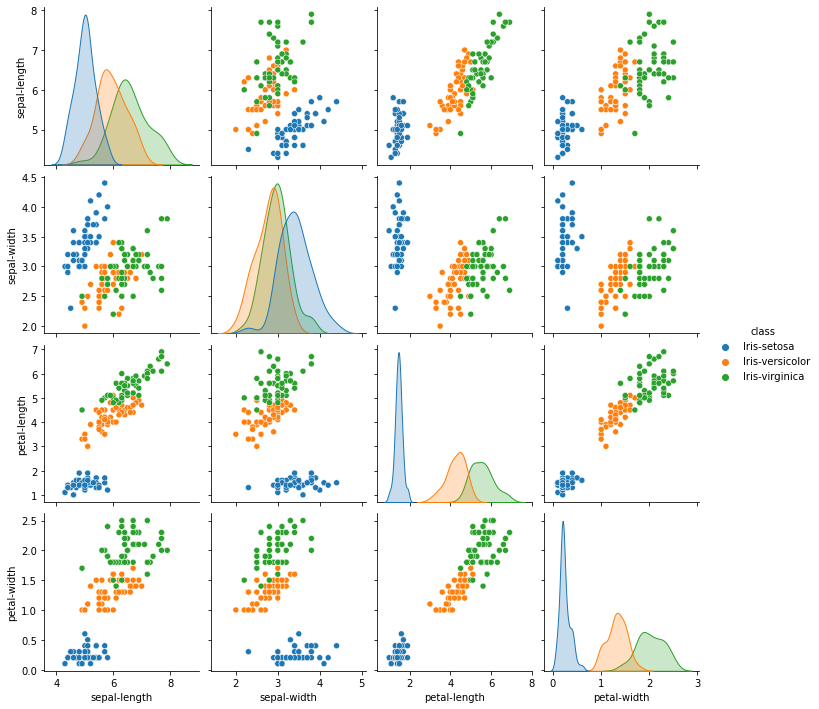

In [7]:
sns.pairplot(iris_data, hue='class')

In [8]:
class_labels = iris_data['class'].unique()
encoder = LabelEncoder()
iris_data['class'] = encoder.fit_transform(iris_data['class'])
class_labels_encoded = encoder.transform(class_labels)

In [9]:
iris_data.corr()['class']

sepal-length    0.782561
sepal-width    -0.419446
petal-length    0.949043
petal-width     0.956464
class           1.000000
Name: class, dtype: float64

[Text(0, 0, 'Iris-setosa'),
 Text(1, 0, 'Iris-versicolor'),
 Text(2, 0, 'Iris-virginica')]

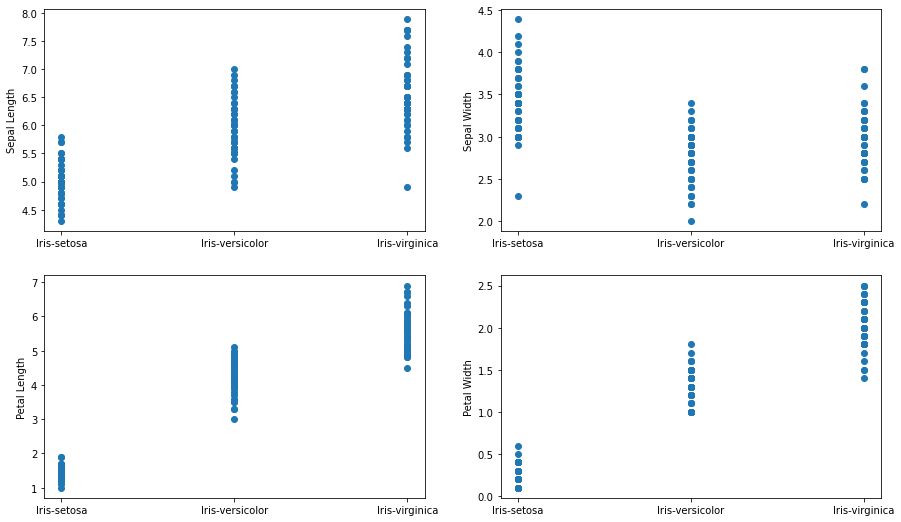

In [10]:
fig,((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2, figsize=(15,9))

ax1.scatter(x = iris_data['class'], y = iris_data['sepal-length'])
ax1.set_ylabel("Sepal Length")
ax1.set_xticks(class_labels_encoded)
ax1.set_xticklabels(class_labels)

ax2.scatter(x = iris_data['class'], y = iris_data['sepal-width'])
ax2.set_ylabel("Sepal Width")
ax2.set_xticks(class_labels_encoded)
ax2.set_xticklabels(class_labels)

ax3.scatter(x = iris_data['class'], y = iris_data['petal-length'])
ax3.set_ylabel("Petal Length")
ax3.set_xticks(class_labels_encoded)
ax3.set_xticklabels(class_labels)

ax4.scatter(x = iris_data['class'], y = iris_data['petal-width'])
ax4.set_ylabel("Petal Width")
ax4.set_xticks(class_labels_encoded)
ax4.set_xticklabels(class_labels)


In [11]:
data_X = iris_data.drop('class', axis=1)
data_y = iris_data['class']

Part 2: Training the Gradient Boosting Classifier with the default parameters

In [12]:
X_train, X_test, y_train, y_test = train_test_split(data_X, data_y, test_size=0.2, random_state=1)

In [13]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [35]:
model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1)
model.fit(X_train, y_train)

GradientBoostingClassifier()

In [36]:
y_pred = model.predict(X_test)

In [37]:
print('Accuracy:', accuracy_score(y_test, y_pred))
print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred))
print('Classification Report:', classification_report(y_test, y_pred))

Accuracy: 0.9666666666666667
Confusion Matrix:
 [[11  0  0]
 [ 0 12  1]
 [ 0  0  6]]
Classification Report:               precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      0.92      0.96        13
           2       0.86      1.00      0.92         6

    accuracy                           0.97        30
   macro avg       0.95      0.97      0.96        30
weighted avg       0.97      0.97      0.97        30



Part 3: Tuning the hyper-parameters of the Gradient Boosting Classifier with the GridSearchCV

In [40]:
cv = KFold(n_splits=5)
grid_param = {'learning_rate': [0.01, 0.05, 0.1, 1],
              'n_estimators' : [10, 50, 100, 500, 1000],
              'max_depth': [2, 5, 8, 11],
              'max_features': [1,2]}
model = GradientBoostingClassifier()
grid = GridSearchCV(model, grid_param, cv=cv, verbose=2)
grid.fit(X_train, y_train)

Fitting 5 folds for each of 160 candidates, totalling 800 fits
[CV] END learning_rate=0.01, max_depth=2, max_features=1, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=2, max_features=1, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=2, max_features=1, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=2, max_features=1, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=2, max_features=1, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=2, max_features=1, n_estimators=50; total time=   0.5s
[CV] END learning_rate=0.01, max_depth=2, max_features=1, n_estimators=50; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=2, max_features=1, n_estimators=50; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=2, max_features=1, n_estimators=50; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=2, max_features=1, n_estimators=50; total time=   0.

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
             estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': [0.01, 0.05, 0.1, 1],
                         'max_depth': [2, 5, 8, 11], 'max_features': [1, 2],
                         'n_estimators': [10, 50, 100, 500, 1000]},
             verbose=2)

In [41]:
print('Best Parameters:', grid.best_estimator_)
print('Best Score:', grid.best_score_)

Best Parameters: GradientBoostingClassifier(learning_rate=0.05, max_depth=2, max_features=1,
                           n_estimators=50)
Best Score: 0.95


In [42]:
y_pred = grid.predict(X_test)
print('Accuray:', accuracy_score(y_test, y_pred))
print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred))
print('Classification Report:\n', classification_report(y_test, y_pred))

Accuray: 0.9666666666666667
Confusion Matrix:
 [[11  0  0]
 [ 0 12  1]
 [ 0  0  6]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      0.92      0.96        13
           2       0.86      1.00      0.92         6

    accuracy                           0.97        30
   macro avg       0.95      0.97      0.96        30
weighted avg       0.97      0.97      0.97        30

